# SAT Scores data set

### Introduction

The Wakandan Institute of Technology (WIT) wishes to assess the effectiveness of their admission criteria. The main question was: How predictive are SAT score of students' success over their first year. For this, WIT's chief officer of statistics gathered a random sample of 670 newly admitted students.

Each student in the sample took 4 basic STEM courses in the first semester:
- Calculus 1
- Introduction to Computer Science
- Classical Mechanics
- Introduction to Biology

For each student, his/her SAT scores, prior to admission, were recorded. Moreover, at the end of the first semester, the grade of each of the four courses above were marked for every students.

The data appears in the file 'SAT.csv'.

Your job is to analyze the data and prove that there is no connection between SAT scores and grades in first years courses. 
However, if you choose to, you may also try to convince of any possible meaningful and informative connection between the SAT scores and the grades in the courses.


### Notebook

The following imports always make sense.

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

You may now read the data file.

In [70]:
data = pd.read_csv("SAT.csv")

Each row of the data represents a single student.

You may use the rest of the notebook for your analysis.

In [77]:
# remove nan columns
data.dropna(axis='columns', inplace=True)
data.describe()

,SAT score,Calculus I final score,Introduction to Computer Science final score,Classical Mechanics final score,Introduction to Biology final score
count,670.000000,670.000000,670.000000,670.000000,670.000000
mean,1519.265672,73.241791,78.952239,69.707463,81.780597
std,28.952895,9.800310,6.283115,11.621630,8.752599
min,1410.000000,41.000000,56.000000,33.000000,58.000000
25%,1500.000000,67.000000,75.000000,62.000000,76.000000
50%,1520.000000,74.000000,79.000000,70.000000,82.000000
75%,1539.000000,80.000000,83.000000,78.000000,87.000000
max,1600.000000,99.000000,100.000000,100.000000,100.000000


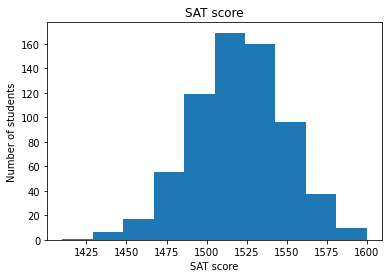

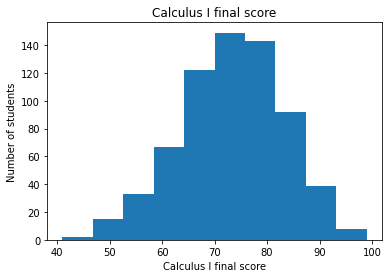

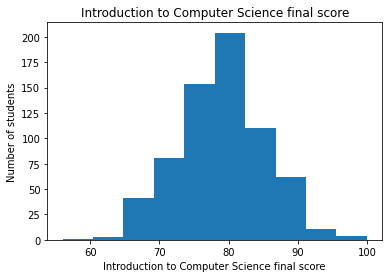

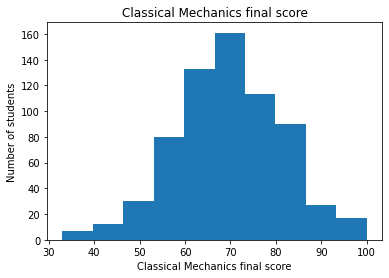

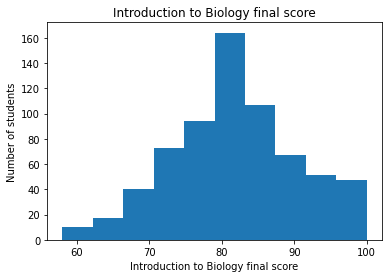

In [85]:
for col in data.columns:
    values = data[col]
    plt.figure()
    plt.hist(values)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Number of students")
    plt.show()

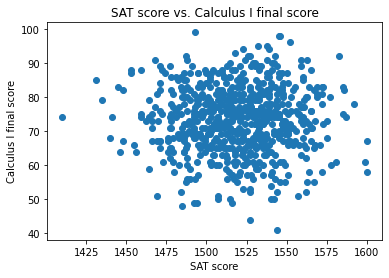

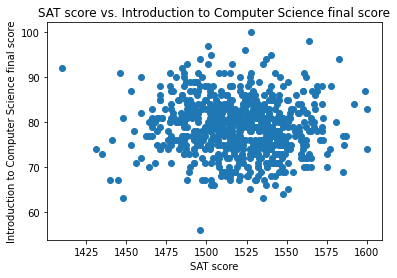

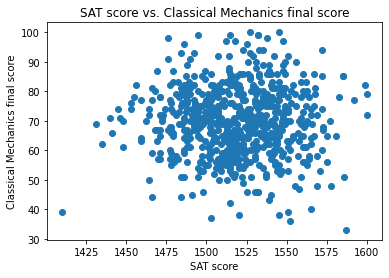

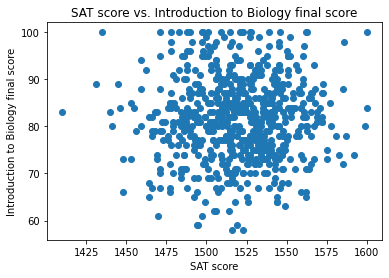

In [83]:
X = data["SAT score"]
for test_score in data.columns[1:]:
    Y = data[test_score]
    plt.figure()
    plt.scatter(X, Y)
    plt.title(f'SAT score vs. {test_score}')
    plt.xlabel("SAT score")
    plt.ylabel(test_score)
    plt.show()

In [86]:
X = data["SAT score"]
Y = data["Calculus I final score"]
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Calculus I final score   R-squared (uncentered):                   0.982
Model:                                OLS   Adj. R-squared (uncentered):              0.982
Method:                     Least Squares   F-statistic:                          3.657e+04
Date:                    Fri, 08 Oct 2021   Prob (F-statistic):                        0.00
Time:                            11:40:15   Log-Likelihood:                         -2486.9
No. Observations:                     670   AIC:                                      4976.
Df Residuals:                         669   BIC:                                      4980.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT score      0.0482      0.000    191.246      0.000       0.048       0.049
==============================================================================
Omnibus:                        4.993   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                5.038
Skew:                          -0.193   Prob(JB):                       0.0805
Kurtosis:                       2.822   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Variables

# Hypotheses